In [4]:
%%time
%run src/main.py --dataset-name 'PubMed' --clustering-overlap True\
    --clustering-method 'danmf' --epochs 100

+----------------------+--------------+
|      Parameter       |    Value     |
+======================+==============+
| Cluster number       | 10           |
+----------------------+--------------+
| Clustering method    | danmf        |
+----------------------+--------------+
| Clustering overlap   | 1            |
+----------------------+--------------+
| Dataset name         | PubMed       |
+----------------------+--------------+
| Dropout              | 0.500        |
+----------------------+--------------+
| Epochs               | 100          |
+----------------------+--------------+
| Layers               | [16, 16, 16] |
+----------------------+--------------+
| Learning rate        | 0.010        |
+----------------------+--------------+
| Membership closeness | 0.100        |
+----------------------+--------------+
| Seed                 | 42           |
+----------------------+--------------+
| Test ratio           | 0.700        |
+----------------------+--------------+


/home/mahmood/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/mahmood/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Num Clusters: 8
2685
3588
3295
3280
5616
1929
3289


Train Loss:   0%|          | 0/100 [00:00<?, ?it/s]

9597
Training started.



Train Loss: 0.361: 100%|██████████| 100/100 [00:37<00:00,  2.63it/s]



F-1 score: 0.8421
CPU times: user 2min 55s, sys: 1.39 s, total: 2min 56s
Wall time: 1min 11s


In [3]:
%%time
%run src/main.py --dataset-name 'Cora' --clustering-overlap True\
    --clustering-method 'danmf' --epochs 100

+----------------------+--------------+
|      Parameter       |    Value     |
+======================+==============+
| Cluster number       | 10           |
+----------------------+--------------+
| Clustering method    | danmf        |
+----------------------+--------------+
| Clustering overlap   | 1            |
+----------------------+--------------+
| Dataset name         | Cora         |
+----------------------+--------------+
| Dropout              | 0.500        |
+----------------------+--------------+
| Epochs               | 100          |
+----------------------+--------------+
| Layers               | [16, 16, 16] |
+----------------------+--------------+
| Learning rate        | 0.010        |
+----------------------+--------------+
| Membership closeness | 0.100        |
+----------------------+--------------+
| Seed                 | 42           |
+----------------------+--------------+
| Test ratio           | 0.700        |
+----------------------+--------------+


/home/mahmood/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
Train Loss: 1.9418:   0%|          | 0/100 [00:00<?, ?it/s]

Num Clusters: 8
432
521
634
439
629
212
548
894
Training started.



Train Loss: 0.1321: 100%|██████████| 100/100 [00:08<00:00, 11.34it/s]


F-1 score: 0.8060
CPU times: user 40.4 s, sys: 231 ms, total: 40.6 s
Wall time: 11.2 s


In [1]:
%%time
%run src/main.py --dataset-name 'CiteSeer' --clustering-overlap True\
    --clustering-method 'danmf' --epochs 10

+----------------------+--------------+
|      Parameter       |    Value     |
+======================+==============+
| Cluster number       | 10           |
+----------------------+--------------+
| Clustering method    | danmf        |
+----------------------+--------------+
| Clustering overlap   | 1            |
+----------------------+--------------+
| Dataset name         | CiteSeer     |
+----------------------+--------------+
| Dropout              | 0.500        |
+----------------------+--------------+
| Epochs               | 10           |
+----------------------+--------------+
| Layers               | [16, 16, 16] |
+----------------------+--------------+
| Learning rate        | 0.010        |
+----------------------+--------------+
| Membership closeness | 0.100        |
+----------------------+--------------+
| Seed                 | 42           |
+----------------------+--------------+
| Test ratio           | 0.700        |
+----------------------+--------------+


/home/mahmood/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
Train Loss: 1.8463:   0%|          | 0/10 [00:00<?, ?it/s]

Num Clusters: 8
303
391
47
843
433
126
551
139
Training started.



Train Loss:   0%|          | 0/10 [00:00<?, ?it/s]


F-1 score: 0.7404
Training started.



Train Loss:   0%|          | 0/10 [00:00<?, ?it/s]


F-1 score: 0.5468
Training started.



Train Loss: 1.6013: 100%|██████████| 10/10 [00:50<00:00,  5.08s/it]



F-1 score: 0.2666


 Mean F-1 score: 0.5179
CPU times: user 4min 34s, sys: 17.4 s, total: 4min 51s
Wall time: 1min 22s


In [10]:
import numpy as np
s = []
for i in range(50):
    s.append(i)
print(np.mean(s), 49*50/100)    

24.5 24.5


In [2]:
%load_ext autoreload
%autoreload 2
%run src/main.py --dataset_name 'PubMed' --cluster-number 8 \
    --clustering-method 'metis' --epochs 10
# %run src/main.py --dataset_name 'Cora' --cluster-number 8 \
#     --clustering-method 'metis' --epochs 100

usage: main.py [-h] [--dataset-name DATASET_NAME]
               [--clustering-overlap CLUSTERING_OVERLAP]
               [--membership-closeness MEMBERSHIP_CLOSENESS]
               [--clustering-method [CLUSTERING_METHOD]] [--epochs EPOCHS]
               [--seed SEED] [--dropout DROPOUT]
               [--learning-rate LEARNING_RATE] [--test-ratio TEST_RATIO]
               [--cluster-number CLUSTER_NUMBER]
main.py: error: unrecognized arguments: --dataset_name PubMed


SystemExit: 2

In [5]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='../tmp/ENZYMES', name='ENZYMES')
ENZYMES(600)

KeyboardInterrupt: 

In [2]:
# M.Amintoosi
# nx.write_edgelist(nx.path_graph(4), "test.edgelist")
# G = nx.read_edgelist("test.edgelist")
type(G)

NameError: name 'G' is not defined

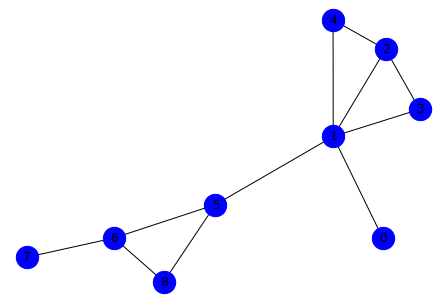

In [10]:
import networkx as nx
G=nx.Graph();
G=nx.read_edgelist("input/edges.txt") # edges.txt contains the edge list of your graph

# help to draw https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
nx.draw(G,with_labels = True,node_color='b',node_size=500);

from node2vec import Node2Vec
# Generate walks
node2vec = Node2Vec(G, dimensions=2, walk_length=20, num_walks=10,workers=4)
# Learn embeddings 
model = node2vec.fit(window=10, min_count=1)
#model.wv.most_similar('1')
model.wv.save_word2vec_format("tmp/embedding.emb") #save the embedding in file embedding.emb

In [12]:
from sklearn.cluster import KMeans
import numpy as np


X = np.loadtxt("tmp/embedding.emb", skiprows=1) # load the embedding of the nodes of the graph
#print(X)
# sort the embedding based on node index in the first column in X
X=X[X[:,0].argsort()]; 
#print(X)
Z=X[0:X.shape[0],1:X.shape[1]]; # remove the node index from X and save in Z

kmeans = KMeans(n_clusters=2, random_state=0).fit(Z) # apply kmeans on Z
labels=kmeans.labels_  # get the cluster labels of the nodes.
print(labels)
print(np.where(labels==0))

[0 1 1 0 0 1 0 1 1]
[ True False False  True  True False  True False False]
